<a href="https://colab.research.google.com/github/IA2021UR/entregable-1-joferne/blob/main/modelo_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. IMPORTACIÓN DE LIBRERÍAS** 

In [1]:
!wget https://raw.githubusercontent.com/IA1819/Code/master/sbs1.py -O sbs.py

--2021-04-14 12:33:11--  https://raw.githubusercontent.com/IA1819/Code/master/sbs1.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1691 (1.7K) [text/plain]
Saving to: ‘sbs.py’

sbs.py              100%[===================>]   1.65K  --.-KB/s    in 0s      

2021-04-14 12:33:11 (27.9 MB/s) - ‘sbs.py’ saved [1691/1691]



In [2]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
from sbs import SBS
%matplotlib inline

**2. CARGA DE DATOS** 

In [3]:
!unzip ia2021.zip

Archive:  ia2021.zip
  inflating: test.csv                
  inflating: train.csv               


In [4]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

**3. PREPROCESADO DE DATOS** 

In [5]:
X =  df_train.values[:,:-1]
Y =  df_train.values[:,-1]
(trainData, testData, trainLabels, testLabels) = train_test_split(X,Y,test_size=0.15, random_state=42)

Elimino los elementos que tengan varianza 0.

In [6]:
selector = VarianceThreshold()
selector.fit_transform(trainData)

array([[ 1.41109e+03, -9.43298e+05,  3.80000e+01,  5.20000e+01,
         1.33000e+02],
       [ 2.04403e+04, -3.42627e+03,  9.20000e+01,  1.63000e+02,
         1.16200e+03],
       [ 1.59581e+05, -7.84700e+03,  9.60000e+01,  3.89000e+02,
         5.53600e+03],
       ...,
       [ 1.75506e+03, -1.46636e+03,  1.60000e+01,  7.60000e+01,
         1.47000e+02],
       [ 2.73150e+04, -1.87000e+03,  3.90000e+01,  1.56000e+02,
         1.36400e+03],
       [ 1.45631e+05, -6.37838e+03,  1.50000e+02,  3.62000e+02,
         5.84700e+03]])

In [7]:
mms = MinMaxScaler()
trainData_norm = mms.fit_transform(trainData)
testData_norm = mms.transform(testData)

stdsc = StandardScaler()
trainData_std = stdsc.fit_transform(trainData)
testData_std = stdsc.transform(testData)

trainData_norm_std = stdsc.fit_transform(trainData_norm)
testData_norm_std = stdsc.transform(testData_norm)

In [8]:
for k in range(2,10,1):
    mean = 0
    forest = RandomForestClassifier(min_samples_split=k,random_state=58)
    forest.fit(trainData_std, trainLabels)
    score = forest.score(testData_std,testLabels)
    print("k=%d, precisión=%.2f%%" % (k, score * 100))
    mean = (mean + score)/(k-1)

k=2, precisión=74.44%
k=3, precisión=74.61%
k=4, precisión=75.44%
k=5, precisión=74.06%
k=6, precisión=74.78%
k=7, precisión=74.00%
k=8, precisión=74.22%
k=9, precisión=73.83%


In [9]:
for k in range(2,200,1):
  for i in range(2,15,1):
    forest = RandomForestClassifier(min_samples_split=i,random_state=k)
    forest.fit(trainData_std, trainLabels)
    score = forest.score(testData_std,testLabels)
    if(score * 100 > 75.):
      print("k=%d, precisión=%.2f%%" % (k, score * 100))

KeyboardInterrupt: ignored

In [10]:
forest = RandomForestClassifier(min_samples_split=4,random_state=58)
forest.fit(trainData_std, trainLabels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=58, verbose=0,
                       warm_start=False)

Observamos si merece la pena hacer una reducción de descriptores.

In [11]:
sbs= SBS(forest,k_features=1)
sbs.fit(trainData,trainLabels)

In [12]:
k4 = list(sbs.subsets_[1]) 
print(df_train.columns[1:][k4])

Index(['EEG', 'HR', 'CIRCULATION', 'ACTIVITY'], dtype='object')


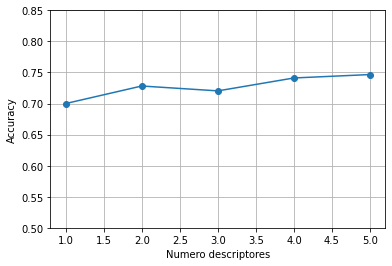

In [13]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat,sbs.scores_,marker='o')
plt.ylim([0.5,0.85])
plt.ylabel('Accuracy')
plt.xlabel('Numero descriptores')
plt.grid()
plt.show()

In [14]:
k4 = list(sbs.subsets_[1]) 
print(df_train.columns[1:][k4])

forest.fit(trainData,trainLabels)
print('Training accuracy:', forest.score(trainData,trainLabels))
print('Test accuracy:', forest.score(testData,testLabels))

forest.fit(trainData_norm,trainLabels)
print('Training accuracy:', forest.score(trainData_norm,trainLabels))
print('Test accuracy:', forest.score(testData_norm,testLabels))

forest.fit(trainData_std,trainLabels)
print('Training accuracy:', forest.score(trainData_std,trainLabels))
print('Test accuracy:', forest.score(testData_std,testLabels))

forest.fit(trainData_norm_std,trainLabels)
print('Training accuracy:', forest.score(trainData_norm_std,trainLabels))
print('Test accuracy:', forest.score(testData_norm_std,testLabels))

forest.fit(trainData_std[:,k4],trainLabels)
print('Training accuracy:', forest.score(trainData_std[:,k4],trainLabels))
print('Test accuracy:', forest.score(testData_std[:,k4],testLabels))

Index(['EEG', 'HR', 'CIRCULATION', 'ACTIVITY'], dtype='object')
Training accuracy: 0.9850965780958918
Test accuracy: 0.75
Training accuracy: 0.9857829198941073
Test accuracy: 0.745
Training accuracy: 0.9862731640356898
Test accuracy: 0.7544444444444445
Training accuracy: 0.9862731640356898
Test accuracy: 0.7544444444444445
Training accuracy: 0.9654868124325914
Test accuracy: 0.75


No merece la pena. Es curioso que para otra partición del dataset si que podríamos reducir a 4. Pero tal y como lo tenemos no merece la pena hacer la reducción.

In [15]:
forest = RandomForestClassifier(min_samples_split=4,random_state=58)
forest.fit(trainData_std, trainLabels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=58, verbose=0,
                       warm_start=False)

Creamos el csv de predicciones.

In [16]:
testdf = pd.read_csv("test.csv")
test = testdf.values

stdsc = StandardScaler()
trainData_std = stdsc.fit_transform(trainData)
test_std = stdsc.transform(test)

predicciones1 = forest.predict(test_std)

In [17]:
pred=pd.DataFrame([(i+1,int(pred)) for i, pred in enumerate(predicciones1)]) 

In [18]:
pred.columns=['Id','Prediction'] 

In [21]:
pred.to_csv("submission.csv",sep=',',index = False)